In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, LSTM
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
IOT_temp = pd.read_csv("../input/temperature-readings-iot-devices/IOT-temp.csv")

In [3]:
#conhecendo o dataset
IOT_temp.head(5)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
#conhecendo o BD
IOT_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [5]:
#obtendo a "estatística inicial"
IOT_temp.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [6]:
#Contando quantos valores de temperaturas são In ou Out
IOT_temp.groupby("out/in").count()

,id,room_id/id,noted_date,temp
out/in,,,,
In,20345,20345,20345,20345
Out,77261,77261,77261,77261


In [7]:
#separando o dataset entre valores de In e Out
df_in=IOT_temp[IOT_temp["out/in"]=="In"]
df_out=IOT_temp[IOT_temp["out/in"]=="Out"]
df_out.head(5)

,id,room_id/id,noted_date,temp,out/in
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


In [8]:
df_out.head(5)

,id,room_id/id,noted_date,temp,out/in
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


In [9]:
df_out.head()

,id,room_id/id,noted_date,temp,out/in
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


In [10]:
#realizando o indice reset
df_in.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
3,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
4,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In
...,...,...,...,...,...
20340,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
20341,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
20342,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
20343,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [11]:
df_out.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
1,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
2,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
3,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
4,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out
...,...,...,...,...,...
77256,__export__.temp_log_99990_0866b052,Room Admin,28-07-2018 07:07,32,Out
77257,__export__.temp_log_106366_5b89332c,Room Admin,28-07-2018 07:07,32,Out
77258,__export__.temp_log_128809_5b2685b6,Room Admin,28-07-2018 07:07,32,Out
77259,__export__.temp_log_111718_05b8d88d,Room Admin,28-07-2018 07:07,32,Out


<Figure size 720x720 with 0 Axes>

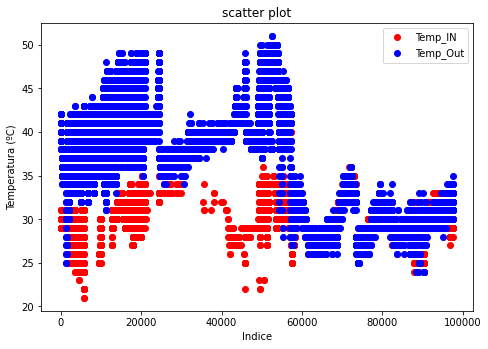

In [12]:
#plotando os valores
plt.figure(figsize=(10,10))  #definir o tamanho da figura
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_in.index, df_in.temp, color='r')
ax.scatter(df_out.index, df_out.temp, color='b')
ax.set_xlabel('Indice')
ax.set_ylabel('Temperatura (ºC)')
ax.legend(["Temp_IN", "Temp_Out"])
ax.set_title('scatter plot')
plt.show()

<Figure size 720x720 with 0 Axes>

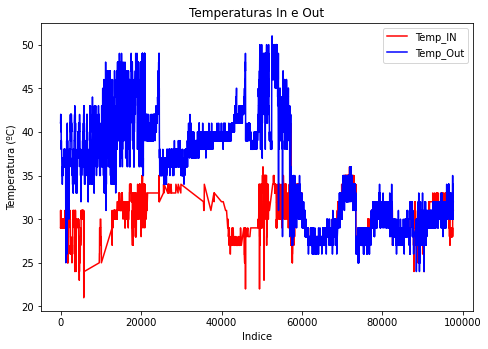

In [13]:
#plotando de outra forma
plt.figure(figsize=(10,10))  #definir o tamanho da figura
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df_in.index, df_in.temp, color='r')
ax.plot(df_out.index, df_out.temp, color='b')
ax.set_xlabel('Indice')
ax.set_ylabel('Temperatura (ºC)')
ax.set_title('Temperaturas In e Out')
ax.legend(["Temp_IN", "Temp_Out"])
plt.show()


<AxesSubplot:>

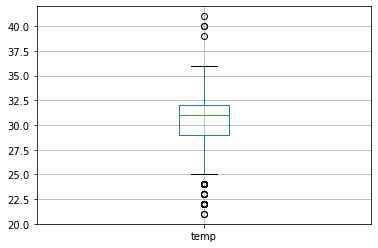

In [14]:
#verificando se existem evidências de outliers nos valores dentro da residência
df_in.boxplot("temp")

array([[<AxesSubplot:title={'center':'temp'}>]], dtype=object)

<Figure size 1080x1080 with 0 Axes>

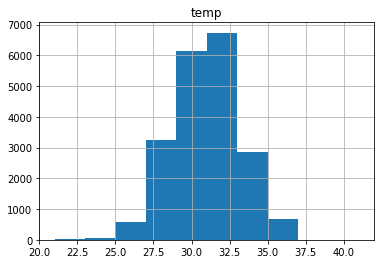

In [15]:
plt.figure(figsize=(15,15))  #definir o tamanho da figura
df_in.hist()

<AxesSubplot:>

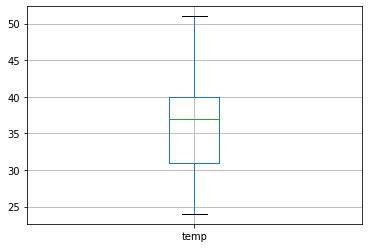

In [16]:
#verificando se existem evidências de outliers nos valores dentro da residência
df_out.boxplot("temp")

In [17]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20345 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20345 non-null  object
 1   room_id/id  20345 non-null  object
 2   noted_date  20345 non-null  object
 3   temp        20345 non-null  int64 
 4   out/in      20345 non-null  object
dtypes: int64(1), object(4)
memory usage: 953.7+ KB


In [18]:
#transformando os dados
df_in['noted_date']= pd.to_datetime(df_in['noted_date']) 
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20345 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          20345 non-null  object        
 1   room_id/id  20345 non-null  object        
 2   noted_date  20345 non-null  datetime64[ns]
 3   temp        20345 non-null  int64         
 4   out/in      20345 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 953.7+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#ordenando o dataset
df_in=df_in.sort_values(by=['noted_date'])

In [20]:
df_in.head()

,id,room_id/id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In


In [21]:
#aplicando o index reset
df_in.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
1,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
2,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
3,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
4,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In
...,...,...,...,...,...
20340,__export__.temp_log_41083_917dc7ae,Room Admin,2018-12-10 20:25:00,35,In
20341,__export__.temp_log_41090_c0ed0bd1,Room Admin,2018-12-10 20:35:00,34,In
20342,__export__.temp_log_41091_8546ae99,Room Admin,2018-12-10 20:37:00,35,In
20343,__export__.temp_log_41129_77d8da57,Room Admin,2018-12-10 21:31:00,34,In


In [22]:
#aplicando o mesmo procedimento para o dataframe de out
df_out['noted_date']= pd.to_datetime(df_out['noted_date']) 
df_out=df_out.sort_values(by=['noted_date'])
df_out.reset_index(drop=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
1,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
2,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
3,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out
4,__export__.temp_log_127981_32c85db7,Room Admin,2018-01-11 00:25:00,40,Out
...,...,...,...,...,...
77256,__export__.temp_log_41241_36e995ef,Room Admin,2018-12-10 23:41:00,44,Out
77257,__export__.temp_log_41244_1cef6363,Room Admin,2018-12-10 23:43:00,44,Out
77258,__export__.temp_log_41249_7d6819cd,Room Admin,2018-12-10 23:49:00,44,Out
77259,__export__.temp_log_41250_eed95540,Room Admin,2018-12-10 23:51:00,45,Out


In [23]:
print("Registros existentes no df_IN: ",df_in.count())
print("Registros existentes no df_OUt: ",df_out.count())

Registros existentes no df_IN:  id            20345
room_id/id    20345
noted_date    20345
temp          20345
out/in        20345
dtype: int64
Registros existentes no df_OUt:  id            77261
room_id/id    77261
noted_date    77261
temp          77261
out/in        77261
dtype: int64


In [24]:
#comparando as duas temperaturas estatísticamente
frame = { 'temp_in': df_in.temp, 'temp_out': df_out.temp } 
df_in_out=pd.DataFrame(frame)
df_in_out.head()

,temp_in,temp_out
0,29.0,NaN
1,29.0,NaN
2,NaN,41.0
3,NaN,41.0
4,31.0,NaN


In [25]:
df_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97606 entries, 0 to 97605
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_in   20345 non-null  float64
 1   temp_out  77261 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [26]:
#exemplificando o pivot
table = pd.pivot_table(IOT_temp, values='temp', index=['noted_date'], columns= ["out/in"],fill_value=0)

In [27]:
table

out/in,In,Out
noted_date,,
01-11-2018 00:06,32.0,0.0
01-11-2018 00:07,0.0,40.0
01-11-2018 00:09,0.0,39.0
01-11-2018 00:13,0.0,40.0
01-11-2018 00:23,0.0,40.0
...,...,...
31-10-2018 23:52,0.0,40.0
31-10-2018 23:53,0.0,39.0
31-10-2018 23:54,32.0,0.0


<AxesSubplot:>

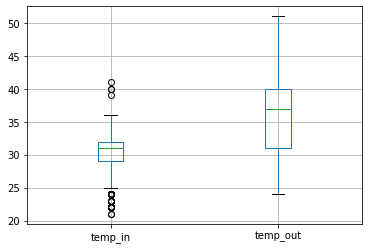

In [28]:
#comparando a igualdade dos valores In e Out
df_in_out.boxplot()

In [29]:
df_in_out.to_csv('dasdsadsa.csv')

In [30]:
df_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97606 entries, 0 to 97605
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_in   20345 non-null  float64
 1   temp_out  77261 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [31]:
#Substituindo Nan por zero
df_in_out=df_in_out.fillna(0)
df_in_out.head()

,temp_in,temp_out
0,29.0,0.0
1,29.0,0.0
2,0.0,41.0
3,0.0,41.0
4,31.0,0.0


In [32]:
#aplicando o teste estatístico ANOVA
import scipy.stats as stats

In [33]:
#stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)
stats.f_oneway(df_in_out["temp_in"], df_in_out["temp_out"])

F_onewayResult(statistic=122923.701048226, pvalue=0.0)

In [34]:
#aplicando o teste de tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [35]:
#preparação do dataframe
from sklearn import preprocessing
new_df_IoT=IOT_temp

In [36]:
new_df_IoT.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [37]:
#realizando Lebel_encoder
le = preprocessing.LabelEncoder()

In [38]:
#encontra a quantidade de classes existente
le.fit(new_df_IoT["out/in"])

LabelEncoder()

In [39]:
#mostra as classes existentes
list(le.classes_)

['In', 'Out']

In [40]:
#cria a coluna com as classes
new_df_IoT["classes"]=le.transform(new_df_IoT["out/in"])

In [41]:
new_df_IoT.head()

,id,room_id/id,noted_date,temp,out/in,classes
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,0
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,0
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,1
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,1
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,0


In [42]:
#criando o dataset para o teste de tukey
df_tukey_in=pd.DataFrame({"id":0,"tratamento": "in","resultado":df_in_out.temp_in})
df_tukey_out=pd.DataFrame({"id":1,"tratamento": "out","resultado":df_in_out.temp_out})

df_tukey_in.count()

id            97606
tratamento    97606
resultado     97606
dtype: int64

In [43]:
df_tukey_out.count()

id            97606
tratamento    97606
resultado     97606
dtype: int64

In [44]:
#concatenando os dfs
df_tukey=pd.concat([df_tukey_in, df_tukey_out])
df_tukey=df_tukey.reset_index(drop=True)
df_tukey.head()

,id,tratamento,resultado
0,0,in,29.0
1,0,in,29.0
2,0,in,0.0
3,0,in,0.0
4,0,in,31.0


***Criando um modelo de previsão de séries temporais***

In [45]:
#coleta a serie temporal para o modelo de previsão
df_out_new=IOT_temp[IOT_temp["out/in"]=="Out"]["temp"].values

In [46]:
df_out_new

array([41, 41, 42, ..., 32, 32, 32])

In [47]:
#Transformando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
serie_out = scaler.fit_transform(df_out_new.reshape(-1, 1))

In [48]:
serie_out

array([[0.62962963],
       [0.62962963],
       [0.66666667],
       ...,
       [0.2962963 ],
       [0.2962963 ],
       [0.2962963 ]])

In [49]:
#define a quantidade de dados para treinamento e teste
train=serie_out[:int(len(serie_out)*0.7)]
test=serie_out[int(len(serie_out)*0.7):]

In [50]:
train

array([[0.62962963],
       [0.62962963],
       [0.66666667],
       ...,
       [0.11111111],
       [0.14814815],
       [0.11111111]])

In [51]:
test

array([[0.14814815],
       [0.11111111],
       [0.14814815],
       ...,
       [0.2962963 ],
       [0.2962963 ],
       [0.2962963 ]])

In [52]:
#Tamanho do teste e treinamento
print(len(train), len(test))

54082 23179


In [53]:
#define o intervalo a ser utilizado para entrada da rede neural LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [54]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [55]:
trainX,trainY

(array([[0.62962963, 0.62962963, 0.66666667],
        [0.62962963, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.62962963],
        ...,
        [0.11111111, 0.14814815, 0.11111111],
        [0.14814815, 0.11111111, 0.14814815],
        [0.11111111, 0.14814815, 0.11111111]]),
 array([0.66666667, 0.62962963, 0.62962963, ..., 0.14814815, 0.11111111,
        0.14814815]))

In [56]:
54078*9

486702

In [57]:
#colocando os dados no formato para entrada na rede LSTM em deep learning
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

Definindo o modelo LSTM

In [58]:
from tensorflow.keras.models import Sequential

In [59]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2022-03-23 22:37:53.624571: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [60]:
#mostra o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [61]:
#Treina o modelo
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

2022-03-23 22:37:54.433937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
54078/54078 - 82s - loss: 0.0013
Epoch 2/5
54078/54078 - 80s - loss: 5.3957e-04
Epoch 3/5
54078/54078 - 82s - loss: 5.2841e-04
Epoch 4/5
54078/54078 - 84s - loss: 5.2490e-04
Epoch 5/5
54078/54078 - 84s - loss: 5.1965e-04


In [62]:
# realizando as previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [63]:
# invertendo as previsões
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [64]:
import math
from sklearn.metrics import mean_squared_error

In [65]:
# Calculando os erros de previsão
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Pontuação para o treinamento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Pontuação para o teste: %.2f RMSE' % (testScore))

Pontuação para o treinamento: 0.60 RMSE
Pontuação para o teste: 0.69 RMSE


In [66]:
# realizando shift dos valores para construir o plot dos valores
trainPredictPlot = np.empty_like(serie_out)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [67]:
# realizando shift dos dados de previsão para o treinamento
testPredictPlot = np.empty_like(serie_out)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(serie_out)-1, :] = testPredict


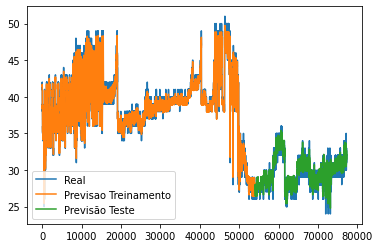

In [68]:
# realizando plot dos dados para treinamento e teste
plt.plot(scaler.inverse_transform(serie_out))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Real","Previsao Treinamento","Previsão Teste"])
plt.show()